# Chapter 02. 데이터 분석

## 실습 가이드
1. 데이터를 다운로드하여 Colab에 불러옵니다.
2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
3. 코드는 위에서부터 아래로 순서대로 실행합니다.
4. 전체 문제 구성은 좌측 첫 번째 아이콘을 통해 확인할 수 있습니다.

## Step 0. Kaggle Survey 소개
- Kaggle이라는 Data Science Community가 있습니다. Kaggle에서는 매년 Kaggle 사용자들을 중심으로 설문조사를 시행합니다. 해당 설문조사 결과는 전세계에 뛰어난 Data Scientist들이 어떻게 일하고 어떤 것들을 공부하고 있는지 알 수 있는 좋은 자료입니다.

- 이번에 사용하는 데이터셋은 며칠 전에 공개된 2021 Kaggle Machine Learning Survey 데이터셋을 사용하여, 한국(South Korea)에서 활동하는 Kaggler들에 대해 살펴보려고 합니다.

모든 예제에 사용하는 데이터들은 Google Drive에 업로드 하여, drive mount 기능을 이용하여 사용합니다.

해당 기능에 대해서 모르시는 분들은 tutorial 영상을 참고하세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>학습목표</b>
- EDA에 대한 이해

- 학습한 numpy, pandas, matplotlib, seaborn을 이용한 분석

- 원하는 데이터를 추출하는 방법

- 출제자: 김용담 강사

## Step 1. 분석할 데이터 불러오기

### 데이터 소개
 
- 데이터의 첫번째 Row에는 각 질문이 어떤 것이었는지 대한 내용이 적혀 있습니다.

- 해당 데이터가 어떻게 수집되었는지, 활용하려면 어떻게 해야하는지 관심 있는 분들은 해당 데이터셋을 다운로드 하면 supplementary_data 폴더에서 해당 내용을 활용할 수 있습니다.

- 아래 링크에서 데이터를 다운로드 받아봅시다. 해당 데이터셋을 받기 위해서는 Kaggle에 회원가입이 되어있어야 하며, 대회 규정에 대해 동의하여야 합니다.

- 해당 대회 데이터셋을 임의로 배포하는 것이 금지되어 있기 때문에, 직접 다운로드 받으시는 것을 권장합니다.

- 데이터셋을 다운로드 받은 뒤, 압축을 해제하면 kaggle-survey-2021 이라는 폴더가 생성됩니다.


- 해당 폴더를 통째로 실습을 진행할 개인 구글 드라이브에 **Colab Notebooks/data** 폴더에 업로드 하세요.

Source : https://www.kaggle.com/c/kaggle-survey-2021/data

### 문제 01. 데이터 불러오기

In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 모든 실습 문제의 데이터 경로의 시작은 Colab Notebook/data로 통일합니다.
# 데이터 경로를 문제의 세팅대로 적고, kaggle_survey_2021_responese.csv 파일을 불러옵니다.
base_path = '/content/drive/MyDrive/Colab Notebooks/data'
survey = pd.read_csv(base_path + "/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
survey

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool

### 문제 02. 데이터 요약정보 확인하기

In [ ]:
# 불러온 dataframe의 정보를 요약 정보를 확인합니다.
survey.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


### 문제 03. 데이터 통계량 확인하기

In [ ]:
survey.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
count,25974,25974,25974,25974,25974,25974,25974,21861,5335,10757,4710,5536,4770,4333,306,243,2217,2936,320,2576,24941,5489,4772,4111,10041,7469,3795,3938,2840,1647,2204,16234,527,1492,9508,9793,1063,210,1771,176,...,1265,1700,784,277,269,527,316,1344,1696,263,3057,293,3497,3649,4762,2184,3332,4753,3222,324,4818,1388,1650,1546,2684,3153,1399,281,1277,1584,634,592,4240,730,738,1021,667,2748,4543,378
unique,5410,12,6,67,8,16,8,2,2,2,2,2,2,2,2,2,2,2,2,2,14,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,484,25-29,Man,India,Master’s degree,Student,1-3 years,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,Visual Studio,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,Sublime Text,Vim / Emacs,MATLAB,Jupyter Notebook,None,Other,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,...,Salesforce,Tableau CRM,Qlik,Domo,TIBCO Spotfire,Alteryx,Sisense,SAP Analytics Cloud,Microsoft Azure Synapse,Thoughtspot,None,Other,"Automated data augmentation (e.g. imgaug, albu...",Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",Automated model architecture searches (e.g. da...,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,None,Other,Google Cloud AutoML,H2O Driverless AI,Databricks AutoML,DataRobot AutoML,Amazon Sagemaker Autopilot,Azure Automated Machine Learning,None,Other,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,None,Other
freq,42,4931,20598,7434,10132,6804,7874,21860,5334,10756,4709,5535,4769,4332,305,242,2216,2935,319,2575,20213,5488,4771,4110,10040,7468,3794,3937,2839,1646,2203,16233,526,1491,9507,9792,1062,209,1770,175,...,1264,1699,783,276,268,526,315,1343,1695,262,3056,292,3496,3648,4761,2183,3331,4752,3221,323,4817,1387,1649,1545,2683,3152,1398,280,1276,1583,633,591,4239,729,737,1020,666,2747,4542,377


### 문제 04. 분석 column 정하기

- 학력에 관한 정보를 알아보기 위하여, Q1, Q2, Q3, Q4 column을 잘라봅시다.

In [ ]:
# 해당 데이터셋은 column이 너무 많아 전체적인 정보를 확인하기 힘듭니다.
selected_cols = ["Q1", "Q2", "Q3", "Q4"]
temp = survey[selected_cols]
temp

,Q1,Q2,Q3,Q4
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...
1,50-54,Man,India,Bachelor’s degree
2,50-54,Man,Indonesia,Master’s degree
3,22-24,Man,Pakistan,Master’s degree
4,45-49,Man,Mexico,Doctoral degree
...,...,...,...,...
25969,30-34,Man,Egypt,Bachelor’s degree
25970,22-24,Man,China,Master’s degree
25971,50-54,Man,Sweden,Doctoral degree
25972,45-49,Man,United States of America,Master’s degree


## Step 2. 분석에 사용할 row(data) 정하기

### 문제 04. 한국 찾기

In [ ]:
# 잘라온 데이터에서 한국은 어떤 텍스트로 표현이 되는지 찾아보세요.
temp.Q3.unique()

array(['In which country do you currently reside?', 'India', 'Indonesia',
       'Pakistan', 'Mexico', 'Russia', 'Turkey', 'Australia', 'Nigeria',
       'Greece', 'Belgium', 'Japan', 'Egypt', 'Singapore', 'Brazil',
       'Poland', 'China', 'Iran, Islamic Republic of...',
       'United States of America', 'Italy', 'Viet Nam', 'Israel', 'Peru',
       'South Africa', 'Other', 'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 

###  문제 05. 불러온 temp에서 한국에 해당하는 데이터만 뽑기

In [ ]:
korean = temp.loc[temp.Q3 == "South Korea", :]
korean

,Q1,Q2,Q3,Q4
276,22-24,Man,South Korea,Bachelor’s degree
373,50-54,Man,South Korea,Master’s degree
410,30-34,Man,South Korea,Bachelor’s degree
482,35-39,Man,South Korea,Bachelor’s degree
492,45-49,Man,South Korea,Master’s degree
...,...,...,...,...
25497,25-29,Man,South Korea,Master’s degree
25628,25-29,Man,South Korea,Bachelor’s degree
25842,25-29,Man,South Korea,Master’s degree
25867,45-49,Prefer not to say,South Korea,Doctoral degree


### 문제 06. 나이 column 통계량 확인하기

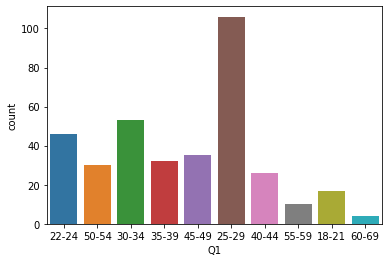

In [ ]:
# 나이에 해당하는 column의 countplot을 그려보세요.
sns.countplot(data=korean, x="Q1")

### 문제 07. 성별 column 통계량 확인하기

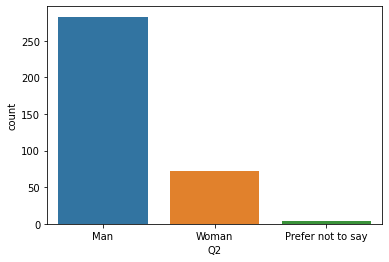

In [ ]:
# 성별에 해당하는 column의 countplot을 그려보세요.
sns.countplot(data=korean, x="Q2")

### 문제 08. 최종학력 column 통계량 확인하기

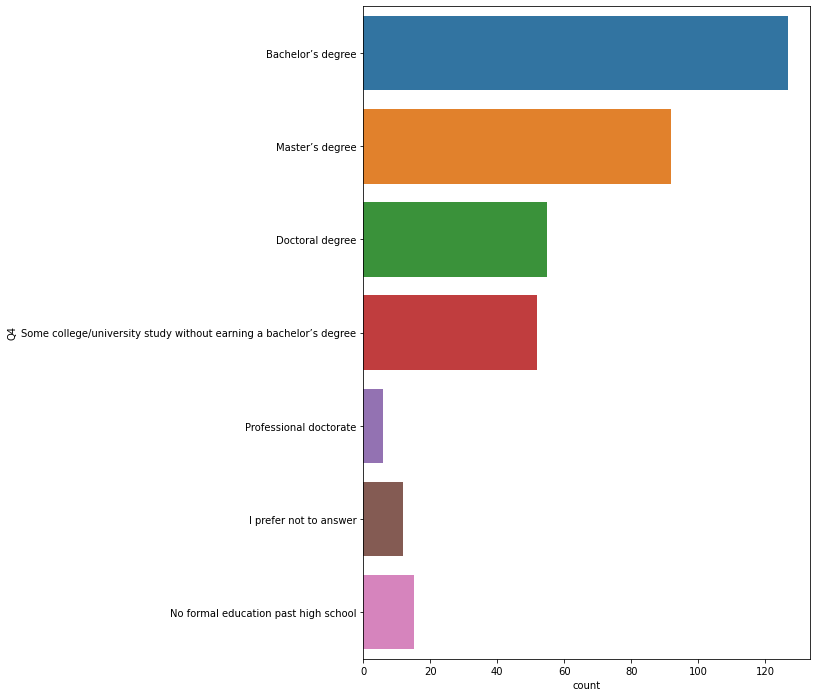

In [ ]:
# 최종학력에 해당하는 column의 countplot을 그려보세요.
plt.figure(figsize=(8, 12))
sns.countplot(data=korean, y="Q4")

## Step 3. 시각화 그래프 변형해보기

### 문제 10. 나이 column에 대해서 그렸던 그래프를 나이대 순서대로 정렬해서 출력해보기

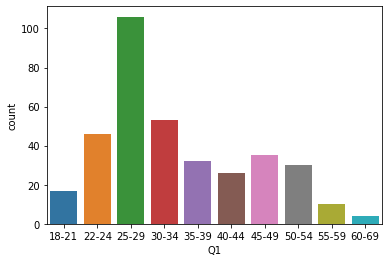

In [ ]:
# x축을 나이대 별로 정렬하여 countplot을 출력해보세요.
X = korean.Q1.value_counts().sort_index()
sns.countplot(data=korean, x="Q1", order=X.index)

### 문제 11. 나이 column에 대해서 빈도가 많은 순서대로 정렬해서 출력해보기

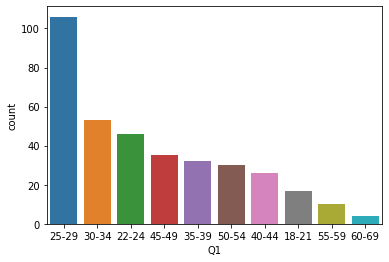

In [ ]:
# x축을 빈도 순으로 정렬하여 countplot을 출력해보세요.
X = korean.Q1.value_counts().sort_values(ascending=False)
sns.countplot(data=korean, x="Q1", order=X.index)

### 문제 12. 문제 11번의 그래프에서 color palette를 autumn으로 바꿔보세요.

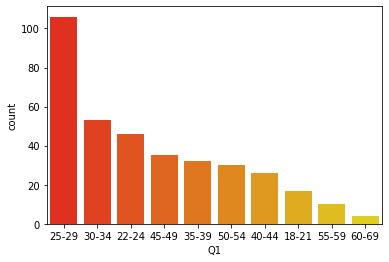

In [ ]:
# x축을 빈도 순으로 정렬하여 countplot을 출력해보세요.
X = korean.Q1.value_counts().sort_values(ascending=False)
sns.countplot(data=korean, x="Q1", order=X.index, palette="autumn")

### 문제 13. 성별 column에 대해서 빈도가 많은 순서대로 정렬하여 출력하기

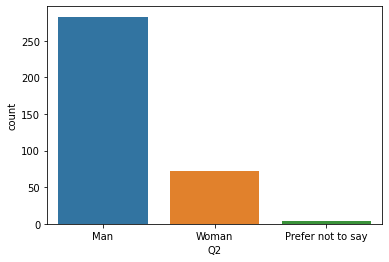

In [ ]:
# x축을 나이대 별로 정렬하여 countplot을 출력해보세요.
X = korean.Q2.value_counts().sort_values()[::-1]
sns.countplot(data=korean, x="Q2", order=X.index)

### 문제 14. 문제 13번의 그래프를 count가 아닌 비율로 바꿔보세요.

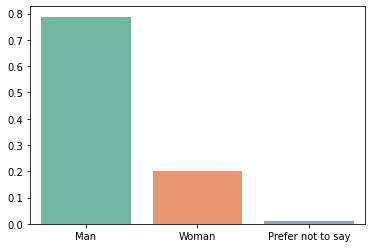

In [ ]:
# x축을 나이대 별로 정렬하여 countplot을 출력해보세요.
X = korean.Q2.value_counts(normalize=True).sort_values()[::-1]
sns.barplot(x=X.index, y=X.values, palette="Set2")

### 문제 15. 최종학력에 해당하는 column을 빈도 순으로 그리는 countplot을 그려보세요.

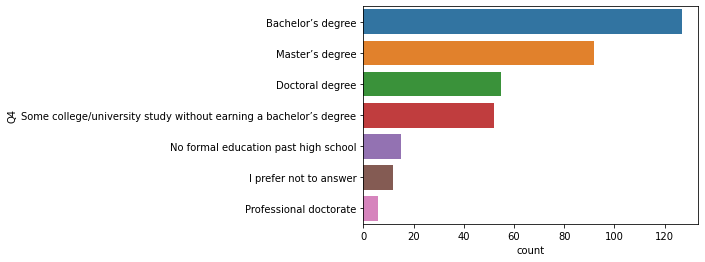

In [ ]:
# 최종학력에 해당하는 column의 countplot을 그려보세요.
plt.figure(figsize=(6, 4))
X = korean.Q4.value_counts().sort_values()[::-1]
sns.countplot(data=korean, y="Q4", order=X.index)

### 문제 16. 문제 15번의 그래프에서 빈도를 비율로 변환하고, color palette를 Set2로 변경해보세요

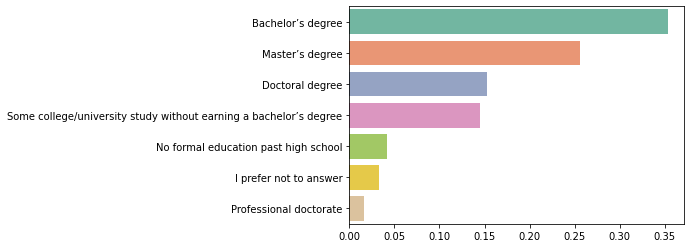

In [ ]:
# 최종학력에 해당하는 column의 countplot을 그려보세요.
plt.figure(figsize=(6, 4))
X = korean.Q4.value_counts(normalize=True).sort_values()[::-1]
sns.barplot(x=X.values, y=X.index, palette="Set2")

## Step 4. 각 나라별 학력 통계 계산하기

- pivot table을 이용하여 나라별 통계를 계산해봅시다.

### 문제 18. 문제 4번에서 만든 temp를 pivot table로 사용하기 위해서 질문에 해당하는 row를 제거해보세요.

In [ ]:
countries = temp.iloc[1:, :]
countries

,Q1,Q2,Q3,Q4
1,50-54,Man,India,Bachelor’s degree
2,50-54,Man,Indonesia,Master’s degree
3,22-24,Man,Pakistan,Master’s degree
4,45-49,Man,Mexico,Doctoral degree
5,45-49,Man,India,Doctoral degree
...,...,...,...,...
25969,30-34,Man,Egypt,Bachelor’s degree
25970,22-24,Man,China,Master’s degree
25971,50-54,Man,Sweden,Doctoral degree
25972,45-49,Man,United States of America,Master’s degree


### 문제 19. 문제 4번에서 만든 temp를 이용하여 나라별로 나이대별 빈도를 계산하는 pivot table을 만들어보세요.

In [ ]:
pt = pd.pivot_table(data=countries.loc[:, ["Q1", "Q3"]], index=["Q3"], columns="Q1", aggfunc={"Q1":"count"})
pt

Q1          ...             
Q1                                                   18-21   22-24  ...  60-69   70+
Q3                                                                  ...             
Algeria                                                6.0    10.0  ...    NaN   NaN
Argentina                                             13.0     8.0  ...    9.0   1.0
Australia                                             16.0    20.0  ...   21.0   8.0
Austria                                                3.0     7.0  ...    2.0   NaN
Bangladesh                                            56.0   131.0  ...    NaN   1.0
Belarus                                                7.0     7.0  ...    NaN   1.0
Belgium                                                2.0     6.0  ...    2.0   NaN
Brazil                                                50.0    78.0  ...   17.0   1.0
Canada                                                17.0    25.0  ...   20.0   6.0
Chile                                                  3.0     4.0  ...    4.0   1.0
China                                                206.0   275.0  ...    NaN   1.0
Colombia                                              24.0    24.0  ...    6.0   NaN
Czech Republic                                         5.0    12.0  ...    1.0   NaN
Denmark                                                3.0     3.0  ...    2.0   NaN
Ecuador                                                4.0     5.0  ...    1.0   NaN
Egypt                                                122.0   129.0  ...    NaN   NaN
Ethiopia                                               2.0     1.0  ...    NaN   NaN
France                                                16.0    57.0  ...   14.0   5.0
Germany                                               23.0    30.0  ...   16.0   3.0
Ghana                                                  8.0    25.0  ...    1.0   NaN
Greece                                                 5.0    14.0  ...    NaN   NaN
Hong Kong (S.A.R.)                                    10.0    11.0  ...    1.0   NaN
I do not wish to disclose my location                 15.0    12.0  ...    NaN   1.0
India                                               2719.0  1795.0  ...   20.0   6.0
Indonesia                                            150.0    93.0  ...    1.0   NaN
Iran, Islamic Republic of...                          29.0    46.0  ...    NaN   NaN
Iraq                                                   6.0     6.0  ...    NaN   NaN
Ireland                                                7.0     7.0  ...    1.0   NaN
Israel                                                10.0     7.0  ...    8.0   1.0
Italy                                                 14.0    36.0  ...   14.0   3.0
Japan                                                 64.0    93.0  ...   49.0   9.0
Kazakhstan                                            12.0     6.0  ...    NaN   NaN
Kenya                                                 36.0    86.0  ...    1.0   NaN
Malaysia                                              20.0    28.0  ...    1.0   1.0
Mexico                                                28.0    38.0  ...    9.0   3.0
Morocco                                               20.0    46.0  ...    4.0   NaN
Nepal                                                 13.0    29.0  ...    NaN   NaN
Netherlands                                           12.0     7.0  ...    5.0   NaN
Nigeria                                               87.0   130.0  ...    2.0   NaN
Norway                                                 5.0     4.0  ...    2.0   NaN
Other                                                158.0   200.0  ...   31.0  11.0
Pakistan                                             145.0   146.0  ...    5.0   NaN
Peru                                                   8.0    23.0  ...    5.0   NaN
Philippines                                           30.0    18.0  ...    2.0   NaN
Poland                                                15.0   

### 문제 20. 문제 19번에서 출력한 pivot table의 NaN을 모두 0으로 바꿔보세요.

In [ ]:
pt = pd.pivot_table(data=countries.loc[:, ["Q1", "Q3"]], index=["Q3"], columns="Q1", aggfunc={"Q1":"count"}, fill_value=0)
pt

Q1        ...          
Q1                                                 18-21 22-24  ... 60-69 70+
Q3                                                              ...          
Algeria                                                6    10  ...     0   0
Argentina                                             13     8  ...     9   1
Australia                                             16    20  ...    21   8
Austria                                                3     7  ...     2   0
Bangladesh                                            56   131  ...     0   1
Belarus                                                7     7  ...     0   1
Belgium                                                2     6  ...     2   0
Brazil                                                50    78  ...    17   1
Canada                                                17    25  ...    20   6
Chile                                                  3     4  ...     4   1
China                                                206   275  ...     0   1
Colombia                                              24    24  ...     6   0
Czech Republic                                         5    12  ...     1   0
Denmark                                                3     3  ...     2   0
Ecuador                                                4     5  ...     1   0
Egypt                                                122   129  ...     0   0
Ethiopia                                               2     1  ...     0   0
France                                                16    57  ...    14   5
Germany                                               23    30  ...    16   3
Ghana                                                  8    25  ...     1   0
Greece                                                 5    14  ...     0   0
Hong Kong (S.A.R.)                                    10    11  ...     1   0
I do not wish to disclose my location                 15    12  ...     0   1
India                                               2719  1795  ...    20   6
Indonesia                                            150    93  ...     1   0
Iran, Islamic Republic of...                          29    46  ...     0   0
Iraq                                                   6     6  ...     0   0
Ireland                                                7     7  ...     1   0
Israel                                                10     7  ...     8   1
Italy                                                 14    36  ...    14   3
Japan                                                 64    93  ...    49   9
Kazakhstan                                            12     6  ...     0   0
Kenya                                                 36    86  ...     1   0
Malaysia                                              20    28  ...     1   1
Mexico                                                28    38  ...     9   3
Morocco                                               20    46  ...     4   0
Nepal                                                 13    29  ...     0   0
Netherlands                                           12     7  ...     5   0
Nigeria                                               87   130  ...     2   0
Norway                                                 5     4  ...     2   0
Other                                                158   200  ...    31  11
Pakistan                                             145   146  ...     5   0
Peru                                                   8    23  ...     5   0
Philippines                                           30    18  ...     2   0
Poland                                                15    41  ...     4   0
Portugal                                               7     7  ...     1   0
Romania                                                3    12  ...     0   0
Russia                                               112   107  ...    17   3
Saudi Arabia                                           7     8  ...     2   

### 문제 21. 이번에는 나라별로 성별 빈도를 출력하는 pivot table을 만들어보세요.

In [ ]:
pt = pd.pivot_table(data=countries.loc[:, ["Q2", "Q3"]], index=["Q3"], columns="Q2", aggfunc={"Q2":"count"})
pt

Q2  ...        
Q2                                                     Man  ...   Woman
Q3                                                          ...        
Algeria                                               32.0  ...    12.0
Argentina                                            157.0  ...    24.0
Australia                                            220.0  ...    38.0
Austria                                               42.0  ...     8.0
Bangladesh                                           272.0  ...    43.0
Belarus                                               45.0  ...     6.0
Belgium                                               56.0  ...     8.0
Brazil                                               664.0  ...    81.0
Canada                                               254.0  ...    64.0
Chile                                                 93.0  ...     9.0
China                                                672.0  ...   106.0
Colombia                                             200.0  ...    25.0
Czech Republic                                        46.0  ...    11.0
Denmark                                               42.0  ...     6.0
Ecuador                                               41.0  ...     8.0
Egypt                                                352.0  ...   127.0
Ethiopia                                              41.0  ...     2.0
France                                               326.0  ...    67.0
Germany                                              379.0  ...    81.0
Ghana                                                 89.0  ...     8.0
Greece                                                84.0  ...    16.0
Hong Kong (S.A.R.)                                    63.0  ...    14.0
I do not wish to disclose my location                 40.0  ...     8.0
India                                               5681.0  ...  1656.0
Indonesia                                            336.0  ...    96.0
Iran, Islamic Republic of...                         141.0  ...    52.0
Iraq                                                  35.0  ...     8.0
Ireland                                               71.0  ...     8.0
Israel                                               113.0  ...    24.0
Italy                                                275.0  ...    30.0
Japan                                                836.0  ...    68.0
Kazakhstan                                            38.0  ...     7.0
Kenya                                                191.0  ...    53.0
Malaysia                                             109.0  ...    43.0
Mexico                                               243.0  ...    33.0
Morocco                                              110.0  ...    27.0
Nepal                                                 68.0  ...     7.0
Netherlands                                          121.0  ...    25.0
Nigeria                                              594.0  ...   107.0
Norway                                                35.0  ...    10.0
Other                                               1004.0  ...   227.0
Pakistan                                             448.0  ...    81.0
Peru                                                 112.0  ...     5.0
Philippines                                           81.0  ...    26.0
Poland                                               185.0  ...    30.0
Portugal                                              89.0  ...    29.0
Romania                                               45.0  ...    16.0
Russia                                               630.0  ...   104.0
Saudi Arabia                                          61.0  ...    27.0
Singapore                                            142.0  ...    38.0
South Africa                                         114.0  ...    28.0
South Korea                                          283.0  ...    72.0
Spain                                                389.0  ...    57.0
Sri Lanka               

### 문제 22. 문제 21의 pivot table에서 미국과 캐나다의 데이터만 가져와보세요.

In [ ]:
american = pt.loc["United States of America"]
canada = pt.loc["Canada"]
display(american)
display(canada)

    Q2                     
Q2  Man                        1949.0
    Nonbinary                    34.0
    Prefer not to say            55.0
    Prefer to self-describe       6.0
    Woman                       606.0
Name: United States of America, dtype: float64

    Q2                     
Q2  Man                        254.0
    Nonbinary                    4.0
    Prefer not to say            8.0
    Prefer to self-describe      1.0
    Woman                       64.0
Name: Canada, dtype: float64

### 문제 23. 문제 22에서 뽑은 두 개의 데이터의 빈도를 plot으로 출력해보세요.

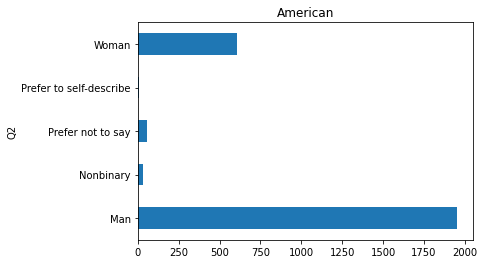

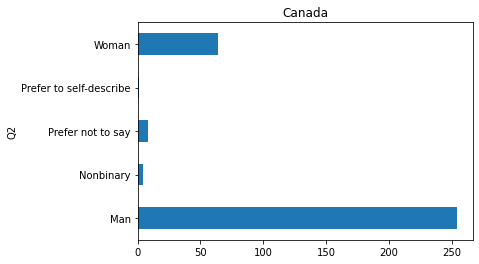

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("American")
american.Q2.plot(kind="barh")
plt.show()
plt.figure(figsize=(6, 4))
plt.title("Canada")
canada.Q2.plot(kind="barh")
plt.show()

## Step 5. 다른 정보에도 응용해보기

### Step 5-1.

- 이번에는 유저들이 자주 사용하는 프로그래밍 언어와 관련된 column들을 뽑아와서 앞에서 수행한 방법과 비슷한 분석을 진행합니다.

- 어떤 column을 가져와야 할까요?

- Q7과 관련된 column들은 어떻게 다 가져올까요?

### 문제 24. 선택한 column 가져오기

In [ ]:
selected_cols = ["Q1", "Q2", "Q3", "Q8"]
Q7s = [col for col in survey.columns if col.startswith("Q7")]
selected_cols = selected_cols + Q7s
temp2 = survey[selected_cols]
temp2

,Q1,Q2,Q3,Q8,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What programming language would you recommend ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...
1,50-54,Man,India,Python,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50-54,Man,Indonesia,Python,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22-24,Man,Pakistan,Python,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,Mexico,Python,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,30-34,Man,Egypt,Python,Python,NaN,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25970,22-24,Man,China,Python,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,50-54,Man,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,45-49,Man,United States of America,Python,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  문제 25. 문제 24에서 가져온 데이터의 Q7으로 시작하는 column들을 합쳐보세요.

- Q7이라는 column을 만들고, row별 데이터를 하나의 list로 합쳐보세요.

In [ ]:
Q7_list = []
Q7_list.append(temp2[Q7s[0]].loc[0])
for _, row in temp2[Q7s][1:].iterrows():
    #print(row)
    temp_list = row[~row.isna()]
    #print(temp_list.values)
    Q7_list.append(temp_list.values)
print(Q7_list[:3])

['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python', array(['Python', 'R'], dtype=object), array(['SQL', 'C', 'C++', 'Java'], dtype=object)]


### 문제 26. 문제 25에서 만든 column으로 Q7과 관련된 column들을 대체해보세요.

In [ ]:
temp2.drop(Q7s, axis=1, inplace=True)
temp2["Q7"] = Q7_list
temp2

,Q1,Q2,Q3,Q8,Q7
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What programming language would you recommend ...,What programming languages do you use on a reg...
1,50-54,Man,India,Python,"[Python, R]"
2,50-54,Man,Indonesia,Python,"[SQL, C, C++, Java]"
3,22-24,Man,Pakistan,Python,"[Python, C++, Java]"
4,45-49,Man,Mexico,Python,[Python]
...,...,...,...,...,...
25969,30-34,Man,Egypt,Python,"[Python, SQL, Javascript, Bash]"
25970,22-24,Man,China,Python,[Python]
25971,50-54,Man,Sweden,NaN,[]
25972,45-49,Man,United States of America,Python,"[Python, SQL]"


### 문제 27. 무응답자들 제거하기

In [ ]:
# Q7과 Q8에 대해서 응답하지 않은 데이터를 제거합니다.
temp3 = temp2.dropna()
temp_len = temp3.Q7.apply(lambda x: len(x))
temp3["Q7_len"] = temp_len
temp3 = temp3.loc[temp3.Q7_len != 0, :]
temp3.drop("Q7_len", axis=1, inplace=True)
temp3

,Q1,Q2,Q3,Q8,Q7
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What programming language would you recommend ...,What programming languages do you use on a reg...
1,50-54,Man,India,Python,"[Python, R]"
2,50-54,Man,Indonesia,Python,"[SQL, C, C++, Java]"
3,22-24,Man,Pakistan,Python,"[Python, C++, Java]"
4,45-49,Man,Mexico,Python,[Python]
...,...,...,...,...,...
25967,30-34,Man,India,Python,"[Python, C]"
25968,35-39,Man,South Korea,Python,"[Python, SQL, Bash]"
25969,30-34,Man,Egypt,Python,"[Python, SQL, Javascript, Bash]"
25970,22-24,Man,China,Python,[Python]


### 문제 28. temp3에서 한국인 응답자의 데이터만 뽑아보세요.

In [ ]:
korean = temp3.loc[temp3.Q3 == "South Korea"]
korean

,Q1,Q2,Q3,Q8,Q7
276,22-24,Man,South Korea,Python,[Python]
373,50-54,Man,South Korea,Python,"[Python, SQL, Java, Javascript]"
410,30-34,Man,South Korea,Python,[Python]
482,35-39,Man,South Korea,R,"[Java, Javascript]"
492,45-49,Man,South Korea,Python,"[Python, C, C++]"
...,...,...,...,...,...
25497,25-29,Man,South Korea,Python,"[Python, SQL]"
25628,25-29,Man,South Korea,Python,"[Python, R]"
25842,25-29,Man,South Korea,Python,[Python]
25867,45-49,Prefer not to say,South Korea,R,[R]


### 문제 29. 한국 유저들이 분석에 많이 사용하는 프로그래밍 언어들의 countplot을 그려보세요.

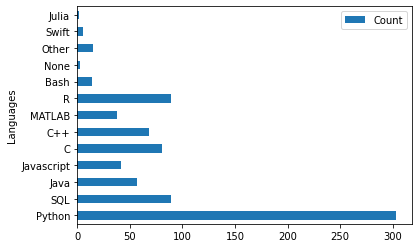

In [ ]:
# x축을 나이대 별로 정렬하여 countplot을 출력해보세요.
from collections import Counter
Q7_data = []
for row in korean.Q7:
    Q7_data = Q7_data + list(row)
counter = Counter(Q7_data)
df = pd.DataFrame({"Languages":counter.keys(), "Count":counter.values()}).set_index("Languages")
df.plot(kind="barh")

### 문제 30. 문제 29에서 생성한 데이터를 빈도순으로 정렬하고 color palette를 Set2로 지정해서 출력해보세요.

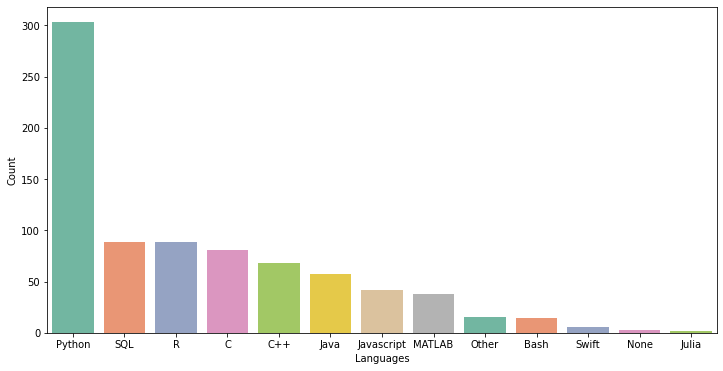

In [ ]:
X = df.sort_values(by="Count", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=X.index, y=X.Count, palette="Set2")

### 문제 31. temp3에서 한국 사용자들이 시작언어로 가장 많이 추천한 프로그래밍 언어에 대해서 countplot을 그려보세요.

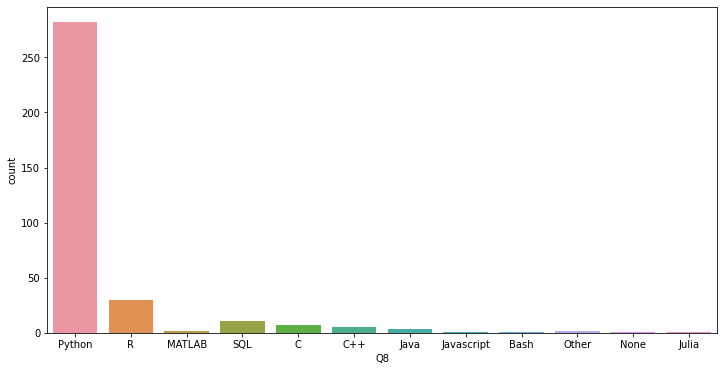

In [ ]:
# x축을 빈도 순으로 정렬하여 countplot을 출력해보세요.
plt.figure(figsize=(12, 6))
sns.countplot(data=korean, x="Q8")

### 문제 32. 문제 31에서 생성한 그래프를 비율로 변경하고, 낮은 순서부터 출력하는 그래프를 그려보세요.

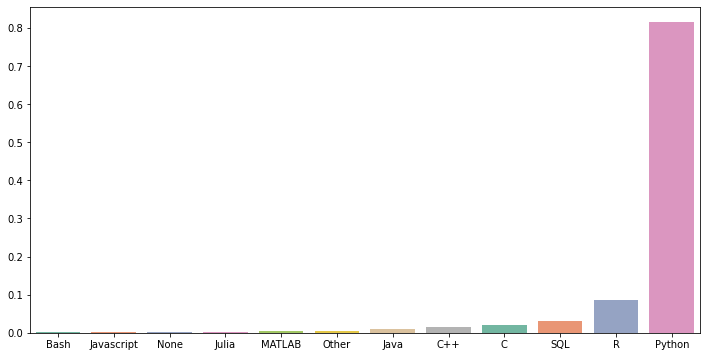

In [ ]:
# x축을 나이대 별로 정렬하여 countplot을 출력해보세요.
X = korean.Q8.value_counts(normalize=True).sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=X.index, y=X.values, palette="Set2")

### Step 5-2.

- 성별로 주로 사용하는 프로그래밍 언어를 가져와봅시다.

### 문제 33. 문제 27번에서 만든 temp3에서 pivot table로 사용하기 위해서 질문에 해당하는 row를 제거해보세요.

In [ ]:
genders = temp3.iloc[1:, :]
genders

,Q1,Q2,Q3,Q8,Q7
1,50-54,Man,India,Python,"[Python, R]"
2,50-54,Man,Indonesia,Python,"[SQL, C, C++, Java]"
3,22-24,Man,Pakistan,Python,"[Python, C++, Java]"
4,45-49,Man,Mexico,Python,[Python]
5,45-49,Man,India,Python,"[Python, C, MATLAB]"
...,...,...,...,...,...
25967,30-34,Man,India,Python,"[Python, C]"
25968,35-39,Man,South Korea,Python,"[Python, SQL, Bash]"
25969,30-34,Man,Egypt,Python,"[Python, SQL, Javascript, Bash]"
25970,22-24,Man,China,Python,[Python]


### 문제 34. genders 테이블을 이용하여 성별로 시작 프로그래밍 언어로 추천하는 언어의 빈도를 계산하는 pivot table을 만들어보세요.

In [ ]:
pt = pd.pivot_table(data=genders.loc[:, ["Q2", "Q8"]], index=["Q2"], columns="Q8", aggfunc={"Q8":"count"})
pt

Q8                ...                     
Q8                       Bash      C    C++  ...       R    SQL Swift
Q2                                           ...                     
Man                      31.0  328.0  347.0  ...  1103.0  984.0  12.0
Nonbinary                 1.0    2.0    1.0  ...     6.0    6.0   1.0
Prefer not to say         1.0    8.0    4.0  ...    21.0   23.0   NaN
Prefer to self-describe   NaN    3.0    NaN  ...     NaN    4.0   NaN
Woman                     5.0   99.0   85.0  ...   315.0  321.0   2.0

[5 rows x 13 columns]

### 문제 35. 문제 34번에서 출력한 pivot table의 NaN을 모두 0으로 바꿔보세요.

In [ ]:
pt = pd.pivot_table(data=genders.loc[:, ["Q2", "Q8"]], index=["Q2"], columns="Q8", aggfunc={"Q8":"count"}, fill_value=0)
pt

Q8                 ...                        
Q8                      Bash    C  C++ Java  ... Python     R  SQL Swift
Q2                                           ...                        
Man                       31  328  347  174  ...  16291  1103  984    12
Nonbinary                  1    2    1    0  ...     60     6    6     1
Prefer not to say          1    8    4    6  ...    261    21   23     0
Prefer to self-describe    0    3    0    0  ...     31     0    4     0
Woman                      5   99   85   62  ...   3570   315  321     2

[5 rows x 13 columns]

### 문제 36. 이번에는 나라별로 시작 추천 프로그래밍 언어 빈도를 출력하는 pivot table을 만들어보세요.

In [ ]:
pt = pd.pivot_table(data=genders.loc[:, ["Q3", "Q8"]], index=["Q3"], columns="Q8", aggfunc={"Q8":"count"}, fill_value=0)
pt

Q8       ...           
Q8                                                 Bash    C  ...  SQL Swift
Q3                                                            ...           
Algeria                                               0    2  ...    0     0
Argentina                                             0    1  ...   12     0
Australia                                             1    3  ...   23     1
Austria                                               0    1  ...    3     0
Bangladesh                                            0    9  ...   10     1
Belarus                                               0    1  ...    1     0
Belgium                                               0    1  ...    1     0
Brazil                                                1   12  ...   50     1
Canada                                                1    2  ...   34     1
Chile                                                 0    1  ...    3     0
China                                                 1   34  ...   21     0
Colombia                                              0    3  ...   18     0
Czech Republic                                        0    0  ...    4     0
Denmark                                               0    0  ...    4     0
Ecuador                                               0    0  ...    1     0
Egypt                                                 1    4  ...   24     0
Ethiopia                                              0    0  ...    0     0
France                                                3    2  ...   18     0
Germany                                               1    1  ...   16     1
Ghana                                                 0    0  ...    4     0
Greece                                                0    3  ...    5     0
Hong Kong (S.A.R.)                                    0    1  ...    7     0
I do not wish to disclose my location                 1    0  ...    4     0
India                                                 3  181  ...  303     4
Indonesia                                             1    6  ...   17     0
Iran, Islamic Republic of...                          0    2  ...    5     0
Iraq                                                  0    0  ...    1     0
Ireland                                               1    0  ...    7     0
Israel                                                0    0  ...    7     0
Italy                                                 0    7  ...   19     1
Japan                                                 3   15  ...   27     1
Kazakhstan                                            0    0  ...    2     0
Kenya                                                 0    0  ...   11     0
Malaysia                                              0    2  ...    8     0
Mexico                                                1    7  ...   16     0
Morocco                                               0    7  ...    6     0
Nepal                                                 0    3  ...    3     0
Netherlands                                           0    1  ...   11     0
Nigeria                                               2    4  ...   51     0
Norway                                                0    0  ...    1     0
Other                                                 5   18  ...   71     0
Pakistan                                              0    5  ...   18     1
Peru                                                  0    2  ...    2     0
Philippines                                           0    3  ...   11     0
Poland                                                0    1  ...    9     0
Portugal                                              0    2  ...    2     0
Romania                                               0    0  ...    2     0
Russia                                                1   12  ...   46     1
Saudi Arabia                                          1    2  ...    4     0
Singapore                                        

### 문제 37. 문제 36의 pivot table에서 프랑스과 독일의 데이터만 가져와보세요.

In [ ]:
france = pt.loc["France"]
germany = pt.loc["Germany"]
display(france)
display(germany)

    Q8        
Q8  Bash            3
    C               2
    C++             9
    Java            1
    Javascript      2
    Julia           6
    MATLAB          6
    None            2
    Other           2
    Python        327
    R              18
    SQL            18
    Swift           0
Name: France, dtype: int64

    Q8        
Q8  Bash            1
    C               1
    C++             3
    Java            6
    Javascript      2
    Julia           2
    MATLAB          3
    None            4
    Other           4
    Python        390
    R              32
    SQL            16
    Swift           1
Name: Germany, dtype: int64

### 문제 38. 문제 37에서 뽑은 두 개의 데이터의 빈도를 plot으로 출력해보세요.

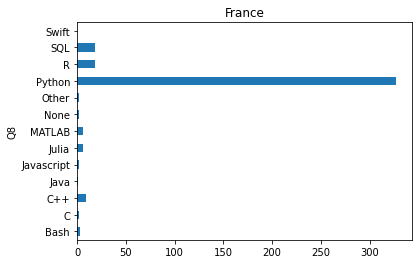

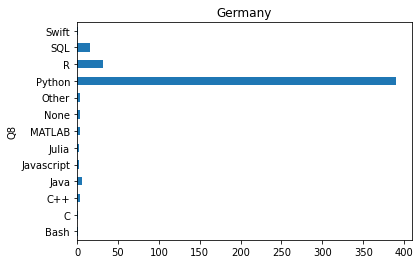

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("France")
france.Q8.plot(kind="barh")
plt.show()
plt.figure(figsize=(6, 4))
plt.title("Germany")
germany.Q8.plot(kind="barh")
plt.show()

### 문제 39. 위에 출력한 두 개의 그래프를 빈도 순으로 내림차순 출력하는 그래프로 바꾸고, color palette를 winter로 바꿔보세요.

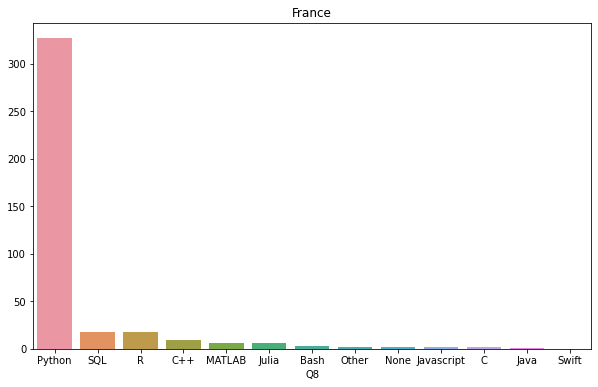

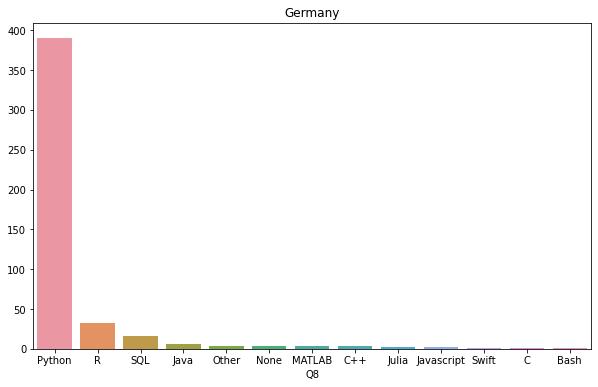

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("France")
df = france.Q8.sort_values()[::-1]
sns.barplot(x=df.index, y=df.values)
plt.figure(figsize=(10, 6))
plt.title("Germany")
df2 = germany.Q8.sort_values()[::-1]
sns.barplot(x=df2.index, y=df2.values)

### Step 5-3.

- 이번에는 유저들이 자주 사용하는 분석 방법론과 관련된 column들을 뽑아와서 앞에서 수행한 방법과 비슷한 분석을 진행합니다.

- 어떤 column을 가져와야 할까요?

- Q17, Q18, Q19와 관련된 column들은 어떻게 다 가져올까요?

### 문제 40. 선택한 column 가져오기

In [ ]:
selected_cols = ["Q1", "Q2", "Q3"]
Q17s = [col for col in survey.columns if col.startswith("Q17")]
Q18s = [col for col in survey.columns if col.startswith("Q18")]
Q19s = [col for col in survey.columns if col.startswith("Q19")]

selected_cols = selected_cols + Q17s + Q18s + Q19s
temp4 = survey[selected_cols]
temp4

,Q1,Q2,Q3,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which of the following ML algorithms do you us...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...
1,50-54,Man,India,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Bayesian Approaches,NaN,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,NaN,Recurrent Neural Networks,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN
2,50-54,Man,Indonesia,Linear or Logistic Regression,Decision Trees or Random Forests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22-24,Man,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,Mexico,NaN,NaN,NaN,NaN,NaN,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,NaN,Recurrent Neural Networks,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...","Image segmentation methods (U-Net, Mask R-CNN,...","Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,30-34,Man,Egypt,Linear or Logistic Regression,NaN,"Gradient Boosting Machines (xgboost, lightgbm,...",NaN,NaN,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,"Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,22-24,Man,China,NaN,NaN,NaN,NaN,NaN,"Dense Neural Networks (MLPs, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,50-54,Man,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,45-49,Man,United States of America,Linear or Logistic Regression,Decision Trees or Random Forests,NaN,NaN,NaN,"Dense Neural Networks (MLPs, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  문제 41. 문제 40에서 가져온 데이터의 Q17으로 시작하는 column들을 합쳐보세요.

- Q17이라는 column을 만들고, row별 데이터를 하나의 list로 합쳐보세요.

In [ ]:
Q17_list = []
Q17_list.append(temp4[Q17s[0]].loc[0])
for _, row in temp4[Q17s][1:].iterrows():
    #print(row)
    temp_list = row[~row.isna()]
    #print(temp_list.values)
    Q17_list.append(temp_list.values)
print(Q17_list[:3])

['Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression', array(['Linear or Logistic Regression',
       'Decision Trees or Random Forests',
       'Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Bayesian Approaches', 'Dense Neural Networks (MLPs, etc)',
       'Convolutional Neural Networks', 'Recurrent Neural Networks'],
      dtype=object), array(['Linear or Logistic Regression',
       'Decision Trees or Random Forests'], dtype=object)]


###  문제 42. 문제 40에서 가져온 데이터의 Q18으로 시작하는 column들을 합쳐보세요.

- Q18이라는 column을 만들고, row별 데이터를 하나의 list로 합쳐보세요.

In [ ]:
Q18_list = []
Q18_list.append(temp4[Q18s[0]].loc[0])
for _, row in temp4[Q18s][1:].iterrows():
    #print(row)
    temp_list = row[~row.isna()]
    #print(temp_list.values)
    Q18_list.append(temp_list.values)
print(Q18_list[:3])

['Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)', array(['General purpose image/video tools (PIL, cv2, skimage, etc)'],
      dtype=object), array([], dtype=object)]


###  문제 43. 문제 40에서 가져온 데이터의 Q19으로 시작하는 column들을 합쳐보세요.

- Q19이라는 column을 만들고, row별 데이터를 하나의 list로 합쳐보세요.

In [ ]:
Q19_list = []
Q19_list.append(temp4[Q19s[0]].loc[0])
for _, row in temp4[Q19s][1:].iterrows():
    #print(row)
    temp_list = row[~row.isna()]
    #print(temp_list.values)
    Q19_list.append(temp_list.values)
print(Q19_list[:3])

['Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)', array(['Word embeddings/vectors (GLoVe, fastText, word2vec)'],
      dtype=object), array([], dtype=object)]


### 문제 44. 문제 41에서 만든 column으로 Q17과 관련된 column들을 대체해보세요.

In [ ]:
temp4.drop(Q17s, axis=1, inplace=True)
temp4["Q17"] = Q17_list
temp4

,Q1,Q2,Q3,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q17
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following ML algorithms do you us...
1,50-54,Man,India,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,"[Linear or Logistic Regression, Decision Trees..."
2,50-54,Man,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Linear or Logistic Regression, Decision Trees..."
3,22-24,Man,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,45-49,Man,Mexico,"General purpose image/video tools (PIL, cv2, s...","Image segmentation methods (U-Net, Mask R-CNN,...","Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"[Dense Neural Networks (MLPs, etc), Convolutio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,30-34,Man,Egypt,"General purpose image/video tools (PIL, cv2, s...",NaN,"Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Linear or Logistic Regression, Gradient Boost..."
25970,22-24,Man,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Dense Neural Networks (MLPs, etc)]"
25971,50-54,Man,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
25972,45-49,Man,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Linear or Logistic Regression, Decision Trees..."


### 문제 45. 문제 42에서 만든 column으로 Q18과 관련된 column들을 대체해보세요.

In [ ]:
temp4.drop(Q18s, axis=1, inplace=True)
temp4["Q18"] = Q18_list
temp4

,Q1,Q2,Q3,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q17,Q18
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following natural language proces...,Which of the following ML algorithms do you us...,Which categories of computer vision methods do...
1,50-54,Man,India,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,"[Linear or Logistic Regression, Decision Trees...","[General purpose image/video tools (PIL, cv2, ..."
2,50-54,Man,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,"[Linear or Logistic Regression, Decision Trees...",[]
3,22-24,Man,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,[],[]
4,45-49,Man,Mexico,NaN,NaN,NaN,NaN,None,NaN,"[Dense Neural Networks (MLPs, etc), Convolutio...","[General purpose image/video tools (PIL, cv2, ..."
...,...,...,...,...,...,...,...,...,...,...,...
25969,30-34,Man,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,"[Linear or Logistic Regression, Gradient Boost...","[General purpose image/video tools (PIL, cv2, ..."
25970,22-24,Man,China,NaN,NaN,NaN,NaN,NaN,NaN,"[Dense Neural Networks (MLPs, etc)]",[]
25971,50-54,Man,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,[],[]
25972,45-49,Man,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,"[Linear or Logistic Regression, Decision Trees...",[]


### 문제 46. 문제 43에서 만든 column으로 Q19과 관련된 column들을 대체해보세요.

In [ ]:
temp4.drop(Q19s, axis=1, inplace=True)
temp4["Q19"] = Q19_list
temp4

,Q1,Q2,Q3,Q17,Q18,Q19
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,Which of the following ML algorithms do you us...,Which categories of computer vision methods do...,Which of the following natural language proces...
1,50-54,Man,India,"[Linear or Logistic Regression, Decision Trees...","[General purpose image/video tools (PIL, cv2, ...","[Word embeddings/vectors (GLoVe, fastText, wor..."
2,50-54,Man,Indonesia,"[Linear or Logistic Regression, Decision Trees...",[],[]
3,22-24,Man,Pakistan,[],[],[]
4,45-49,Man,Mexico,"[Dense Neural Networks (MLPs, etc), Convolutio...","[General purpose image/video tools (PIL, cv2, ...",[None]
...,...,...,...,...,...,...
25969,30-34,Man,Egypt,"[Linear or Logistic Regression, Gradient Boost...","[General purpose image/video tools (PIL, cv2, ...",[]
25970,22-24,Man,China,"[Dense Neural Networks (MLPs, etc)]",[],[]
25971,50-54,Man,Sweden,[],[],[]
25972,45-49,Man,United States of America,"[Linear or Logistic Regression, Decision Trees...",[],[]


### 문제 47. 무응답자들 제거하기

In [ ]:
# Q17, Q18, Q19에 대해서 응답하지 않은 데이터를 제거합니다.
temp5 = temp4.dropna()
temp_len = temp4.Q17.apply(lambda x: len(x))
temp_len2 = temp4.Q18.apply(lambda x: len(x))
temp_len3 = temp4.Q19.apply(lambda x: len(x))
temp5["Q17_len"] = temp_len
temp5["Q18_len"] = temp_len2
temp5["Q19_len"] = temp_len3
temp5 = temp5.loc[temp5.Q17_len != 0, :]
temp5 = temp5.loc[temp5.Q18_len != 0, :]
temp5 = temp5.loc[temp5.Q19_len != 0, :]
temp5.drop("Q17_len", axis=1, inplace=True)
temp5.drop("Q18_len", axis=1, inplace=True)
temp5.drop("Q19_len", axis=1, inplace=True)
temp5

,Q1,Q2,Q3,Q17,Q18,Q19
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,Which of the following ML algorithms do you us...,Which categories of computer vision methods do...,Which of the following natural language proces...
1,50-54,Man,India,"[Linear or Logistic Regression, Decision Trees...","[General purpose image/video tools (PIL, cv2, ...","[Word embeddings/vectors (GLoVe, fastText, wor..."
4,45-49,Man,Mexico,"[Dense Neural Networks (MLPs, etc), Convolutio...","[General purpose image/video tools (PIL, cv2, ...",[None]
25,18-21,Man,India,"[Linear or Logistic Regression, Decision Trees...","[Image segmentation methods (U-Net, Mask R-CNN...","[Word embeddings/vectors (GLoVe, fastText, wor..."
28,22-24,Man,China,"[Linear or Logistic Regression, Bayesian Appro...","[Image segmentation methods (U-Net, Mask R-CNN...","[Encoder-decorder models (seq2seq, vanilla tra..."
...,...,...,...,...,...,...
25921,25-29,Man,Taiwan,"[Linear or Logistic Regression, Decision Trees...","[Object detection methods (YOLOv3, RetinaNet, ...","[Word embeddings/vectors (GLoVe, fastText, wor..."
25931,35-39,Man,India,"[Linear or Logistic Regression, Decision Trees...","[General purpose image/video tools (PIL, cv2, ...","[Word embeddings/vectors (GLoVe, fastText, wor..."
25945,18-21,Woman,India,"[Linear or Logistic Regression, Gradient Boost...","[Image segmentation methods (U-Net, Mask R-CNN...",[None]
25946,35-39,Man,Japan,"[Linear or Logistic Regression, Decision Trees...","[Object detection methods (YOLOv3, RetinaNet, ...","[Encoder-decorder models (seq2seq, vanilla tra..."


### 문제 48. temp5에서 한국인 응답자의 데이터만 뽑아보세요.

In [ ]:
korean = temp5.loc[temp5.Q3 == "South Korea"]
korean

,Q1,Q2,Q3,Q17,Q18,Q19
373,50-54,Man,South Korea,"[Linear or Logistic Regression, Decision Trees...","[General purpose image/video tools (PIL, cv2, ...","[Word embeddings/vectors (GLoVe, fastText, wor..."
837,30-34,Woman,South Korea,"[Linear or Logistic Regression, Convolutional ...","[Object detection methods (YOLOv3, RetinaNet, ...","[Word embeddings/vectors (GLoVe, fastText, wor..."
983,40-44,Man,South Korea,"[Gradient Boosting Machines (xgboost, lightgbm...","[Image segmentation methods (U-Net, Mask R-CNN...","[Transformer language models (GPT-3, BERT, XLn..."
1194,25-29,Man,South Korea,"[Decision Trees or Random Forests, Bayesian Ap...","[General purpose image/video tools (PIL, cv2, ...","[Encoder-decorder models (seq2seq, vanilla tra..."
1749,25-29,Man,South Korea,"[Linear or Logistic Regression, Decision Trees...",[None],[None]
3331,30-34,Man,South Korea,"[Linear or Logistic Regression, Decision Trees...",[Image classification and other general purpos...,[None]
3961,22-24,Man,South Korea,"[Linear or Logistic Regression, Bayesian Appro...","[General purpose image/video tools (PIL, cv2, ...","[Encoder-decorder models (seq2seq, vanilla tra..."
4172,55-59,Man,South Korea,"[Linear or Logistic Regression, Decision Trees...","[General purpose image/video tools (PIL, cv2, ...","[Word embeddings/vectors (GLoVe, fastText, wor..."
4737,35-39,Man,South Korea,"[Dense Neural Networks (MLPs, etc), Convolutio...","[General purpose image/video tools (PIL, cv2, ...","[Encoder-decorder models (seq2seq, vanilla tra..."
4907,45-49,Man,South Korea,"[Linear or Logistic Regression, Decision Trees...",[None],"[Word embeddings/vectors (GLoVe, fastText, wor..."


### 문제 49. 한국 유저들이 분석에 많이 사용하는 머신러닝 기법들의 countplot을 그려보세요.

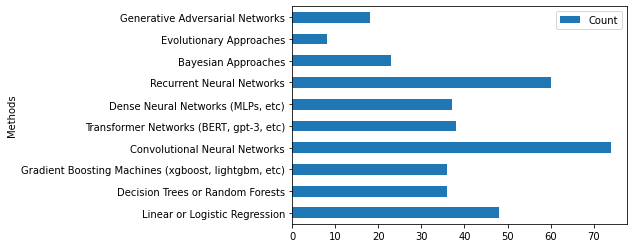

In [ ]:
from collections import Counter
Q17_data = []
for row in korean.Q17:
    Q17_data = Q17_data + list(row)
counter = Counter(Q17_data)
df = pd.DataFrame({"Methods":counter.keys(), "Count":counter.values()}).set_index("Methods")
df.plot(kind="barh")

### 문제 50. 문제 49에서 생성한 데이터를 빈도순으로 정렬하고 color palette를 Set2로 지정해서 출력해보세요.

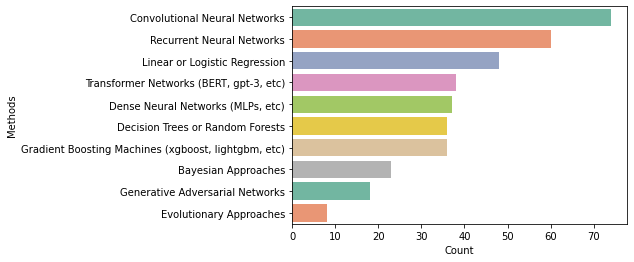

In [ ]:
X = df.sort_values(by="Count", ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(y=X.index, x=X.Count, palette="Set2")

### 문제 51. temp5에서 한국 사용자들이 사용한 CV 기법들에 대해서 countplot을 그려보세요.

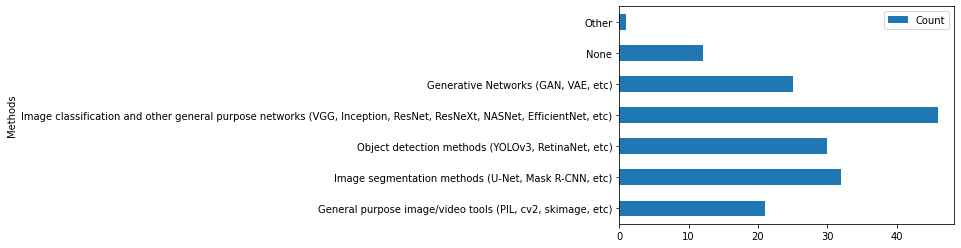

In [ ]:
from collections import Counter
Q18_data = []
for row in korean.Q18:
    Q18_data = Q18_data + list(row)
counter = Counter(Q18_data)
df = pd.DataFrame({"Methods":counter.keys(), "Count":counter.values()}).set_index("Methods")
df.plot(kind="barh")

### 문제 52. 문제 51에서 생성한 그래프를 비율로 변경하고, 낮은 순서부터 출력하는 그래프를 그려보세요.

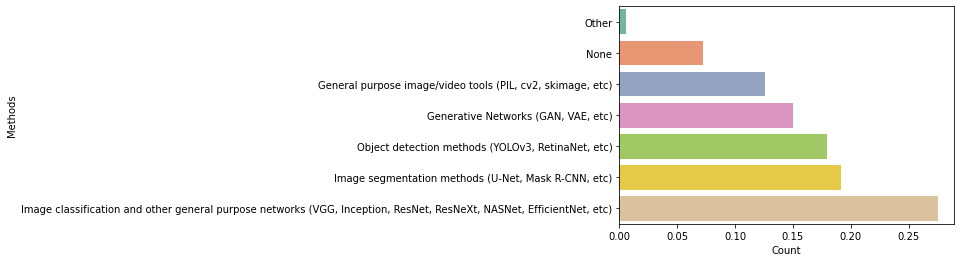

In [ ]:
X = df / df.Count.sum()
X = X.sort_values(by="Count", ascending=True)
plt.figure(figsize=(6, 4))
sns.barplot(y=X.index, x=X.Count, palette="Set2")

### 문제 53. temp5에서 한국 사용자들이 사용한 NLP 기법들에 대해서 countplot을 그려보세요.

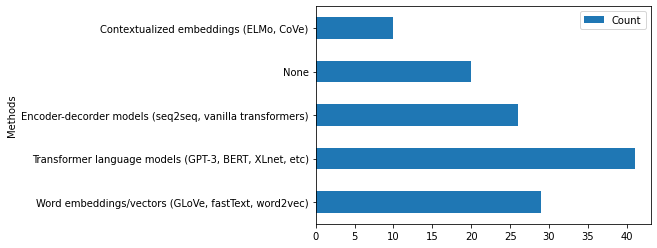

In [ ]:
from collections import Counter
Q19_data = []
for row in korean.Q19:
    Q19_data = Q19_data + list(row)
counter = Counter(Q19_data)
df = pd.DataFrame({"Methods":counter.keys(), "Count":counter.values()}).set_index("Methods")
df.plot(kind="barh")

### 문제 54. 문제 53에서 생성한 그래프를 빈도가 높은 순서로 정렬하고, color palette를 원하는걸로 선정하여 그래프를 그려보세요.

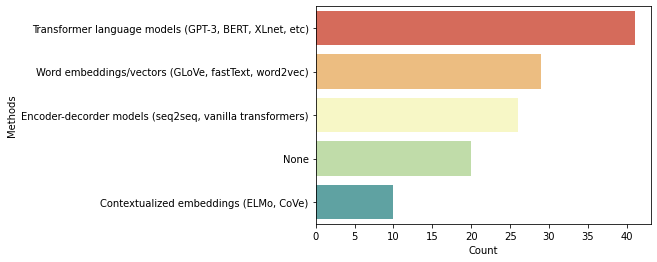

In [ ]:
X = df.sort_values(by="Count", ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(y=X.index, x=X.Count, palette="Spectral")

### Step 5-4.

- 한국 말고 전체 유저가 사용하는 기법들에 대한 정보를 확인해봅시다.

### 문제 55. 문제 47번에서 만든 temp5에서 전체 유저들을 대상으로 사용하는 머신러닝 기법에 대한 빈도 정보를 countplot으로 나타내보세요.

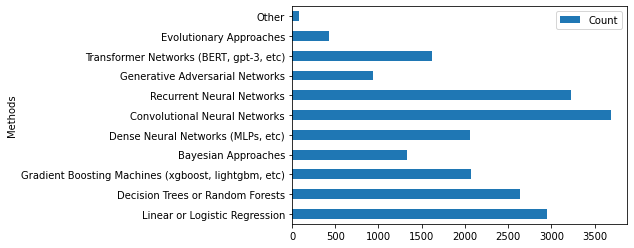

In [ ]:
from collections import Counter
Q17_data = []
for row in temp5[1:].Q17:
    Q17_data = Q17_data + list(row)
counter = Counter(Q17_data)
df = pd.DataFrame({"Methods":counter.keys(), "Count":counter.values()}).set_index("Methods")
df.plot(kind="barh")

### 문제 56. 위에서 생성한 그래프를 비율로 변환하고, 내림차순 정렬을 한 뒤 원하는 color palette를 적용해보세요.

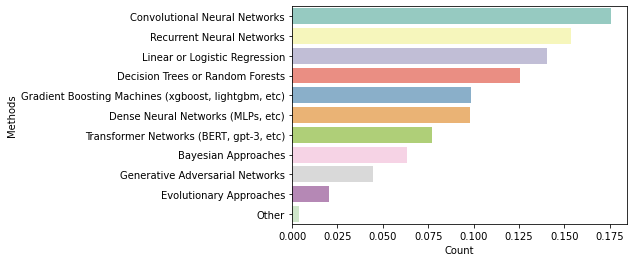

In [ ]:
X = df / df.Count.sum()
X = X.sort_values(by="Count", ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(y=X.index, x=X.Count, palette="Set3")

### 문제 57. 문제 47번에서 만든 temp5에서 전체 유저들을 대상으로 사용하는 CV 기법에 대한 빈도 정보를 countplot으로 나타내보세요.

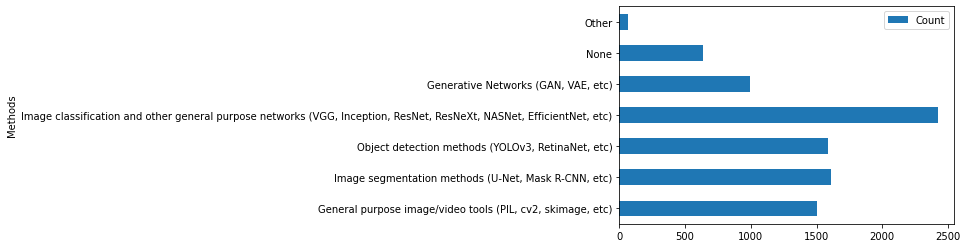

In [ ]:
from collections import Counter
Q18_data = []
for row in temp5[1:].Q18:
    Q18_data = Q18_data + list(row)
counter = Counter(Q18_data)
df = pd.DataFrame({"Methods":counter.keys(), "Count":counter.values()}).set_index("Methods")
df.plot(kind="barh")

### 문제 58. 위에서 생성한 그래프를 빈도가 높은 순서로 정렬하고, color palette를 원하는걸로 선정하여 그래프를 그려보세요.

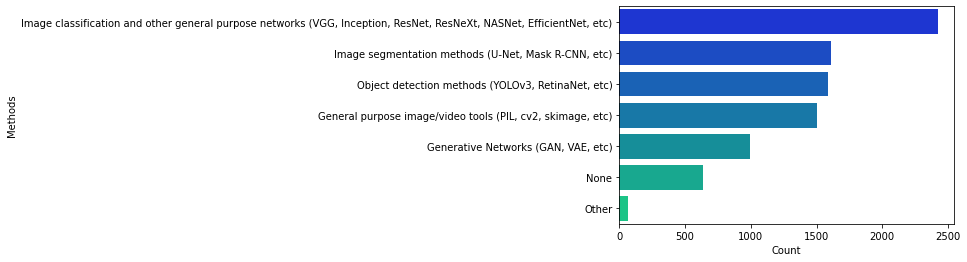

In [ ]:
X = df.sort_values(by="Count", ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(y=X.index, x=X.Count, palette="winter")

### 문제 59. 문제 47번에서 만든 temp5에서 전체 유저들을 대상으로 사용하는 NLP 기법에 대한 빈도 정보를 countplot으로 나타내보세요.

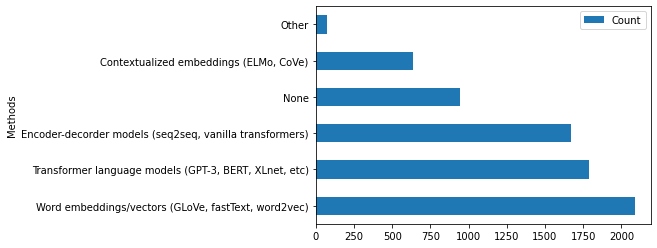

In [ ]:
from collections import Counter
Q18_data = []
for row in temp5[1:].Q19:
    Q19_data = Q19_data+ list(row)
counter = Counter(Q19_data)
df = pd.DataFrame({"Methods":counter.keys(), "Count":counter.values()}).set_index("Methods")
df.plot(kind="barh")

### 문제 60. 위에서 생성한 데이터를 빈도순으로 오름차순 정렬하고 color palette를 Set2로 지정해서 출력해보세요.

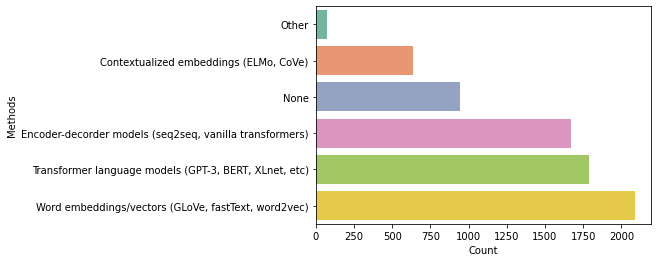

In [ ]:
X = df.sort_values(by="Count", ascending=True)
plt.figure(figsize=(6, 4))
sns.barplot(y=X.index, x=X.Count, palette="Set2")

## Step 6. 요약

- Kaggle Survey 2021 데이터를 여러가지 항목을 기준으로 바꿔보고, 통계량을 출력해고 시각화를 해보았습니다.

- 여러분들이 더 찾아보고 싶은 지표들이 있나요?


- 있다면, 이 코드를 변형해서 자유롭게 구현해보고 Kaggle Notebook을 제출해보세요!


**Go to : https://www.kaggle.com/c/kaggle-survey-2021/code**